# Численные методы. Лабораторная работа №7. Косолапов И. ПМ-31

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mu1(t, c):
    return 1/(1+((-c*t-20)/10)**10)
def mu2(x):
    return 1/(1+((x-20)/10)**10)

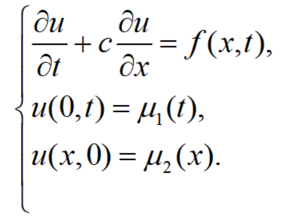

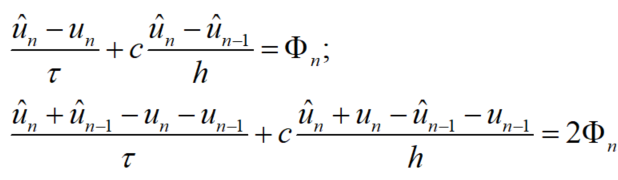

In [4]:
tau, h, c = 0.01, 0.1, 50
def initialization(tau,h,c):
    x = [i for i in np.arange(0, 100+h, h)]
    t = [i for i in np.arange(0, 1+tau, tau)]
    U = np.zeros((len(t), len(x)))
    U[0] = mu2(np.array(x))
    U[:,0] = mu1(np.array(t), c)
    return x, t, U

## Чисто неявная схема

\begin{equation}
\frac{u_n(k+1) - u_n(k)}{\tau} + cu_n(k+1)-u_{n-1}(k+1) = 0 
\\ u_n(k+1) + \frac{c\tau}{h}u_n(k+1) = u_n(k) + \frac{c\tau}{h}u_{n-1}(k+1)
\\ Cu = \frac{c\tau}{h}
\\ u_n(k+1) = \frac{1}{1+Cu}(u_n(k)+Cu \cdot u_{n-1}(k+1)
\\
\end{equation}

Где k - изменение во временной области, n - пространственное изменение

In [5]:
x, t, U = initialization(tau, h, c)

In [6]:
Cu = c*tau/h
for n in range(1, len(x)):
    for k in range(0, len(t)-1):
        U[k+1][n] = 1/(1+Cu)*(U[k][n]+Cu*U[k+1][n-1])
first_scheme = U

## Cхема с полусуммой

\begin{equation}
\\ \frac{u_n(k+1) + u_{n-1}(k+1) - u_n(k) - u_{n-1}(k)}{\tau} + c\frac{u_n(k+1) + u_{n}(k) - u_{n-1}(k+1) - u_{n-1}(k)}{\tau} = 0
\\ \frac{u_n(k+1) + u_{n-1}(k+1) - u_n(k) - u_{n-1}(k)}{\tau} = - c\frac{u_n(k+1) + u_{n}(k) - u_{n-1}(k+1) - u_{n-1}(k)}{\tau}
\\ Cu = \frac{c\tau}{h}
\\ u_n(k+1)(1+Cu) = (u_{n-1}(k)+u_{n-1}(k+1) - u_{n}(k))\cdot Cu + u_{n-1}(k) + u_{n}(k) - u_{n-1}(k+1)
\\ u_n(k+1) = \frac{1}{1+Cu}\cdot \left[(u_{n-1}(k)+u_{n-1}(k+1) - u_{n}(k))\cdot Cu + u_{n-1}(k) + u_{n}(k) - u_{n-1}(k+1)\right]
\\
\\
\end{equation}

Где k - изменение во временной области, n - пространственное изменение

In [7]:
x, t, U = initialization(tau, h, c)

In [8]:
for n in range(1, len(x)):
    for k in range(0, len(t)-1):
        U[k+1][n] = 1/(1+Cu)*(Cu*(U[k][n-1] + U[k+1][n-1] - U[k][n]) + U[k][n-1] + U[k][n] - U[k+1][n-1])
second_scheme = U

In [16]:
x, t, U = initialization(tau, h, c)
U

array([[9.75609756e-04, 1.02570754e-03, 1.07864713e-03, ...,
        9.54929008e-10, 9.43044543e-10, 9.31322574e-10],
       [7.62307508e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.99165447e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.08798309e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.80322442e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.54013316e-09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [23]:
c*tau*U[0][0]

0.0004878048780487805

In [62]:
U

array([[9.75609756e-004, 1.02570754e-003, 1.07864713e-003, ...,
        9.54929008e-010, 9.43044543e-010, 9.31322574e-010],
       [7.62307508e-004, 8.83626781e-005, 8.22239753e-005, ...,
        7.27243051e-011, 7.18192053e-011, 7.09264811e-011],
       [5.99165447e-004, 1.56146826e-005, 6.40101838e-006, ...,
        5.53844792e-012, 5.46951712e-012, 5.40152884e-012],
       ...,
       [4.08798309e-009, 6.66998636e-011, 1.08828486e-012, ...,
        2.44012035e-119, 2.40969480e-119, 2.37968603e-119],
       [3.80322442e-009, 6.20508560e-011, 1.01238420e-012, ...,
        1.85831743e-120, 1.83514586e-120, 1.81229171e-120],
       [3.54013316e-009, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [60]:
c*tau/h

5.0

In [94]:
x, t, U = initialization(tau, h, c)
Cu = c*tau/h
for n in range(1, len(x)):
    for k in range(0, len(t)-1):
        if Cu <=1:
            U[k+1][n] = U[k][n] + Cu*(U[k][n] - U[k][n-1])
        else:
            U[k+1][n] = +U[k][n-1] + (+U[k+1][n-1]-U[k][n-1])/Cu
            #U[k][n] = (h*U[k][n-1] + c*tau*U[k-1][n])/(h+c*tau*h)
third_scheme = U

In [108]:
mu2=lambda x:1/(1+((x-20)/10)**10)
h,tau=0.1,0.01
x=np.arange(0,100+h,h)
t=np.arange(0,1+tau,tau)
f=lambda x,t:0
global c
c=50
mu1=lambda t: 1/(1+((c*t+20)/10)**10)
# Составная схема
def com_scheme(x,t):
    u=np.zeros((len(t),len(x))) 
    u[0]=mu2(x)
    for i in range(len(t)):
        u[i][0]=mu1(t[i])
    for i in range(1,len(t)):
        for j in range(1,len(x)):
            k=c*tau/h
            if k<=1:
                u[i][j] = f(t[i] + tau/2, x[j] - h/2)*tau - k * (u[i-1][j] - u[i-1][j-1]) + u[i-1][j]
            else:
                u[i][j] = f(t[i] + tau/2, x[j] - h/2)*h - (u[i][j-1] - u[i-1][j-1])/k +  u[i][j-1]
    return u
third_scheme=com_scheme(x,t)


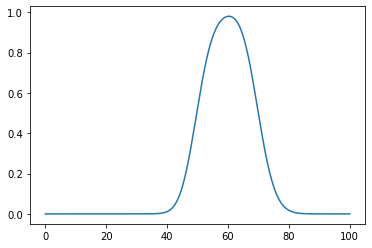

In [111]:
plt.plot(x, third_scheme[80], label = 'Составная схема')

In [100]:
U[60]

array([1.02399990e-07, 1.11061173e-07, 1.20536734e-07, ...,
       2.56732793e-09, 2.53207322e-09, 2.49735033e-09])

In [103]:
U[61]

array([9.27013756e-08, 1.00460267e-07, 1.08940991e-07, ...,
       2.61224475e-09, 2.57631130e-09, 2.54092083e-09])

In [98]:
U

array([[9.75609756e-04, 1.02570754e-03, 1.07864713e-03, ...,
        9.54929008e-10, 9.43044543e-10, 9.31322574e-10],
       [7.62307508e-04, 9.32949307e-04, 1.00715589e-03, ...,
        9.70043312e-10, 9.57951869e-10, 9.46026008e-10],
       [5.99165447e-04, 7.29679096e-04, 8.92295264e-04, ...,
        9.85421266e-10, 9.73118903e-10, 9.60985276e-10],
       ...,
       [4.08798309e-09, 4.33469300e-09, 4.59790454e-09, ...,
        5.07417281e-09, 4.99960819e-09, 4.92624718e-09],
       [3.80322442e-09, 4.03103136e-09, 4.27396067e-09, ...,
        5.16930157e-09, 5.09319857e-09, 5.01832627e-09],
       [3.54013316e-09, 3.75060616e-09, 3.97494632e-09, ...,
        5.26639669e-09, 5.18872060e-09, 5.11230297e-09]])

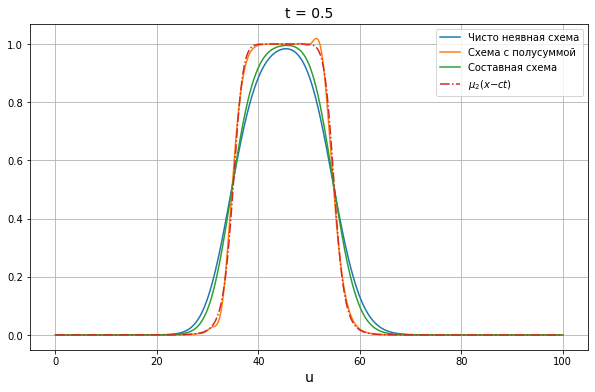

In [112]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('t = 0.5', fontsize = 14)
ax.set_xlabel('x', fontsize = 14)
ax.set_xlabel('u', fontsize = 14)
ax.grid(';')
ax.plot(x, first_scheme[50], label = 'Чисто неявная схема')
ax.plot(x, second_scheme[50] ,label = 'Cхема c полусуммой')
ax.plot(x, third_scheme[50], label = 'Составная схема')
ax.plot(x, mu2(np.array(x)-c*0.5),'-.' ,label = '$\mu_2(x−ct)$')
ax.legend()

In [115]:
from tqdm import tqdm
import glob
import moviepy.editor as mpy

In [119]:
def gif_maker(x,t, U, U1, name):
    plt.style.use('dark_background')
    for i in tqdm(range(0,len(t), 1)):
        fig, ax = plt.subplots(figsize= (12, 7))
        ax.set(xlim=(0, 100), ylim = (0,1.1))
        ax.plot(x, U[i])
        ax.plot(x, U1[i])
        ax.plot(x, third_scheme[i], label = 'Составная схема')
        ax.plot(x, mu2(np.array(x)-c*i/len(t)),'-.')
        ax.set_xlabel('x')
        ax.set_ylabel('U')
        ax.set_title(name)
        ax.legend()
        fig.savefig(f"./pic/{i}.png")
        plt.close()
    gif_name = f'{name}'
    fps = 24
    file_list = glob.glob('./pic/*')
    file_list.sort(key = lambda x: int(x.replace('./pic\\', '').replace('.png', '')))
    clip = mpy.ImageSequenceClip(file_list, fps=fps)
    clip.write_gif('{}.gif'.format(gif_name), fps=fps)

In [ ]:
gif_maker(x,t, first_scheme, second_scheme, 'linear')

 26%|██▌       | 26/101 [00:03<00:09,  7.70it/s]

![ChessUrl](./linear.gif)

**Вывод:** можем видеть, что схема с полусуммой не является монотонной, что согласуется с теоремой о том, что двухслойная линейная монотонная схема не может иметь порядок >=2. А чисто неявная схема - диссипативная, т.е. все лишнии осциляции отсутствуют, но из-за этого, как видим страдает точность